In [8]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import pandas as pd
import time

In [7]:
soup.find("div", attrs={"class": "tupleNew__locationName ellipsis"}).text

'Godrej Greens'

In [2]:
locationName = soup.find("div", attrs={"class": "tupleNew__locationName ellipsis"}).text

NameError: name 'soup' is not defined

In [10]:
result = soup.find("h2", attrs={"class": "tupleNew__propType"})
flat_type,location = result.text.split("in")

In [11]:
rent = soup.find("div", attrs={"class": "tupleNew__priceValWrap"}).find('span').text

In [12]:
deposit = soup.find("div", attrs={"class": "tupleNew__perSqftWrap ellipsis"}).text

In [13]:
sqft = soup.find("span", attrs={"class": "tupleNew__area1Type"}).text

In [14]:
flattype = soup.find("span", attrs={"class": "tupleNew__area1Type"})

In [15]:
area, types = soup.findAll("span", attrs={"class": "tupleNew__area1Type"})[:2]
area = area.text
types = types.text

In [16]:
types

'2 BHK '

In [17]:
highlight_row = soup.find("div", attrs={"class": "tupleNew__onlyHighlight"})
highlights = [x.text for x in highlight_row.findAll("span")]

In [21]:
desc = soup.find("div", attrs={"id": "srp_tuple_description"}).text

In [27]:
owner = soup.find("div", attrs={"class": "tupleNew__pbL2 ellipsis"}).text

In [28]:
print("property name: ",locationName)
print("location: ",location)
print("rent: ",rent)
print("deposit: ",deposit)
print("area: ",area)
print("highlight: ",highlights)
print("description: ",desc)
print("owner: ",owner)

property name:  Godrej Greens
location:   Undri, Pune
rent:  ₹15,000
deposit:  + Deposit ₹35,000
area:  623 sqft
highlight:  ['2 Baths', 'East Facing']
description:  A spacious 2 bhk flat for rent is available in undri in godrej greens, pune. Property has 623 sq.Ft. Carpet area with 2 bathrooms & 2 balconies attached. The flat is built on 623 sq.Ft. Area. Ease of access to 1 covered parking within society. This flat is situated at top in a tower with 17 floors. This is a 1-5 years old society. This property is unfurnished. Property will be leased for 11 mon...
owner:  Shivaay Realty 


In [26]:
owner

<div class="tupleNew__pbL2 ellipsis">Shivaay Realty </div>

In [12]:
import traceback  # Import traceback module for printing exception traceback


def get_property_details(soup):
    try:
        locationName = soup.find(
            "div", attrs={"class": "tupleNew__locationName ellipsis"}
        ).text
        location = soup.find("h2", attrs={"class": "tupleNew__propType"}).text
        # flat_type, location = result.text.split("in")
        rent = (
            soup.find("div", attrs={"class": "tupleNew__priceValWrap"})
            .find("span")
            .text
        )
        deposit = soup.find(
            "div", attrs={"class": "tupleNew__perSqftWrap ellipsis"}
        ).text
        area, types = soup.findAll("span", attrs={"class": "tupleNew__area1Type"})[:2]
        area = area.text
        types = types.text
        highlight_row = soup.find("div", attrs={"class": "tupleNew__onlyHighlight"})
        highlights = [x.text for x in highlight_row.findAll("span")]
        desc = soup.find("div", attrs={"id": "srp_tuple_description"}).text
        owner = soup.find("div", attrs={"class": "tupleNew__pbL2 ellipsis"}).text
        res = {
            "name": locationName,
            "location": location,
            "rent": rent,
            "deposit": deposit,
            "area": area,
            "type": types,
            "highlights": highlights,
            "description": desc,
            "owner": owner,
        }
        print(res)  # Print the extracted details
        return res
    except Exception as e:
        # print("Exception occurred:", e)  # Print the exception
        # traceback.print_exc()  # Print the traceback for the exception
        return None  # Return None in case of an error

In [15]:
base_url = "https://www.99acres.com/property-for-rent-in-pune-ffid-page-"

data = []
for i in range(1,100):
    driver = webdriver.Chrome()
    driver.get(base_url+str(i))
    soup = BeautifulSoup(driver.page_source)
    properties = soup.findAll("section",attrs={'class':''})
    for property_no in properties:
        try:
            details = get_property_details(property_no)
            data.append(details)
        except Exception as e:
            continue
    time.sleep(10)
    driver.close()
filtered_data = [d for d in data if d is not None]
df = pd.DataFrame(filtered_data)

{'name': 'Kolte Patil Life Republic', 'location': '2 BHK Flat for rent in Hinjewadi, Pune', 'rent': '₹20,500', 'deposit': '+ Deposit ₹50,000', 'area': '5,805 sqft', 'type': '2 BHK ', 'highlights': ['2 Baths', 'East Facing'], 'description': '2bhk unfurnished flat available for rent in life republic kolte patil township marunji', 'owner': 'Elite Properties '}
{'name': 'Kolte Patil Life Republic', 'location': '2 BHK Flat for rent in Hinjewadi, Pune', 'rent': '₹20,000', 'deposit': '+ Deposit 3 months rent', 'area': '63,722 sqft', 'type': '2 BHK ', 'highlights': ['2 Baths', 'East Facing'], 'description': "2bhk flat available for rent in life republic kolte patil township marunji.\nIt's available for family or bacholer.", 'owner': 'Elite Properties '}
{'name': 'Manjri BK, Pune', 'location': '3 Bedroom House for rent in Manjri BK, Pune', 'rent': '₹26,000', 'deposit': '+ Deposit ₹75,000', 'area': '2,000 sqft', 'type': '3 BHK ', 'highlights': ['3 Baths', 'East Facing'], 'description': "Rent thi

In [16]:
df

,name,location,rent,deposit,area,type,highlights,description,owner
0,Kolte Patil Life Republic,"2 BHK Flat for rent in Hinjewadi, Pune","₹20,500","+ Deposit ₹50,000","5,805 sqft",2 BHK,"[2 Baths, East Facing]",2bhk unfurnished flat available for rent in li...,Elite Properties
1,Kolte Patil Life Republic,"2 BHK Flat for rent in Hinjewadi, Pune","₹20,000",+ Deposit 3 months rent,"63,722 sqft",2 BHK,"[2 Baths, East Facing]",2bhk flat available for rent in life republic ...,Elite Properties
2,"Manjri BK, Pune","3 Bedroom House for rent in Manjri BK, Pune","₹26,000","+ Deposit ₹75,000","2,000 sqft",3 BHK,"[3 Baths, East Facing]",Rent this 3 bhk house in pune's most sought af...,Tulsi Properties
3,kodre ghule residency,"2 BHK Flat for rent in Ward No 2 Lonkar Nagar,...","₹15,000","+ Deposit ₹30,000",900 sqft,2 BHK,"[2 Baths, East Facing]",Kodre ghule residency is one of pune's most so...,Tulsi Properties
4,Gera Trinity Towers,"2 BHK Flat for rent in Kharadi, Pune","₹37,000",+ Deposit 3 months rent,"1,350 sqft",2 BHK,"[2 Baths, Fitness Center/ Gym]",Available for rent 2 bhk large & spacious flat...,The Guru Realty
...,...,...,...,...,...,...,...,...,...
1041,VTP Leonara,"1 BHK Flat for rent in Mahalunge, Pune","₹23,000",+ Deposit 2 months rent,500 sqft,1 BHK,"[1 Baths, East Facing]",A 1 bhk flat for rent in mahalunge close to al...,Realty Group 24
1042,Vilas Javdekar Yashwin Orizzonte,"1 BHK Flat for rent in Kharadi, Pune","₹25,500",+ Deposit 11 months rent,500 sqft,1 BHK,"[1 Baths, East Facing]",Vilas javdekar yashwin orizzonte is the most p...,grace realty
1043,Nyati Elysia,"2 BHK Flat for rent in Kharadi, Pune","₹32,000",+ Deposit 3 months rent,"1,100 sqft",2 BHK,"[2 Baths, Private Garden]",Explore this amicable nyati elysia of kharadi ...,Prop Laksh
1044,Bramhacorp F Residences,"2 BHK Flat for rent in Kalyani Nagar, Pune","₹37,000",+ Deposit 3 months rent,"1,650 sqft",2 BHK,"[2 Baths, East Facing]",Pune's most popular society bramhacorp f resid...,Himanshu Properties


In [41]:
locationName = soup.find(
    "div", attrs={"class": "tupleNew__locationName ellipsis"}
).text
result = soup.find("h2", attrs={"class": "tupleNew__propType"})
# flat_type, location = result.text.split("in")
print(result.text)
rent = (
    soup.find("div", attrs={"class": "tupleNew__priceValWrap"})
    .find("span")
    .text
)
deposit = soup.find(
    "div", attrs={"class": "tupleNew__perSqftWrap ellipsis"}
).text
area, types = soup.findAll("span", attrs={"class": "tupleNew__area1Type"})[:2]
area = area.text
types = types.text
highlight_row = soup.find("div", attrs={"class": "tupleNew__onlyHighlight"})
highlights = [x.text for x in highlight_row.findAll("span")]
desc = soup.find("div", attrs={"id": "srp_tuple_description"}).text
owner = soup.find("div", attrs={"class": "tupleNew__pbL2 ellipsis"}).text

2 BHK Flat for rent in Sainath Nagar, Pune


In [44]:
res = {
    "name": locationName,
    # "location": location,
    "rent": rent,
    "deposit": deposit,
    "area": area,
    "type": types,
    "highlights": highlights,
    "description": desc,
    "owner": owner,
}
res

{'name': 'Kumar Primavera',
 'rent': '₹31,000',
 'deposit': '+ Deposit 2 months rent',
 'area': '1,041 sqft',
 'type': '2 BHK ',
 'highlights': ['Full Power Backup', 'Gated Society'],
 'description': 'Explore this amicable kumar primavera of sainath nagar in pune ! Live in a 2 bhk flat for rent in sainath nagar. Property has attached 2 bathrooms & 1 balcony with 2 rooms set in 699 sq.Ft. Carpet area. The flat consists of 2 bedrooms, built on 1041 sq.Ft. Society provides 1 covered parking with this flat. The building has a total of 12 floors and this property is situated on 9th floor. Propert...',
 'owner': 'FORTUNE REALTY SOLUTIONS'}

In [57]:
df.to_csv("properties_3.csv")

In [59]:
soup.findAll("a", attrs={"class": "list_header_bold"})

[<a class="list_header_bold" href="https://www.99acres.com/property-for-rent-in-pune-ffid-page-2">Next Page &gt;</a>]

In [66]:
df.to_csv("page1-3.csv")

In [103]:
data = pd.read_csv("properties_1.csv")

In [114]:
def strip_area(area):
    res = area.replace(",","")
    return res.split(" ")[0]


In [115]:
data['area'] = data['area'].apply(strip_area)

In [106]:
def strip_rent(rent):
    if 'Lac' in rent:
        res = rent.split(" ")[0]
        res = res.replace("₹","")
        res = res.replace(",", "")
        res = float(res) * 100000
        return res
    else:
        res = rent.replace("₹", "")
        res = res.replace(",", "")
        res = int(res)
        return res 

In [107]:
data['rent'] = data['rent'].apply(strip_rent)

In [108]:
data.iloc[79]

Unnamed: 0                                                    79
name                                        Panchshil Waterfront
location                                     Kalyani Nagar, Pune
rent                                                    140000.0
deposit                                  + Deposit 3 months rent
area                                                       2,500
type                                                      4 BHK 
highlights                         ['5 Baths', 'Private Garden']
description    Posh,beautiful spacious airy apartment with a ...
owner                                                   HOME IT 
Name: 79, dtype: object

In [116]:
data

,Unnamed: 0,name,location,rent,deposit,area,type,highlights,description,owner
0,0,Godrej Greens,"Undri, Pune",14100.0,"+ Deposit ₹37,000",644,2 BHK,"['2 Baths', 'East Facing']",This lovely 2 bhk apartment for rent in undri ...,Shivaay Realty
1,1,VJ YashOne Infinity,"Punawale, Pune",23000.0,"+ Deposit ₹60,000",950,2 BHK,"['Full Power Backup', 'Gated Society']",This 2 bhk flat in punawale is available in vj...,Owner
2,2,Balaji Mesmero,"Lohegaon, Pune",22500.0,+ Deposit 2 months rent,1040,2 BHK,"['2 Baths', 'East Facing']",2 bhk flat with modular kitchen lift garden ki...,NK Properties
3,3,ARV Ganga Kingston,"NIBM, Pune",27000.0,+ Deposit 3 months rent,1012,2 BHK,"['2 Baths', 'Private Garden']",Rent: 22000,Foursides Property Management
4,4,Solitaire Residency,"Rahatani, Pune",35000.0,"+ Deposit ₹90,000",1444,3 BHK,"['2 Baths', 'Full Power Backup']",The rose valley society is the one of the famo...,Bardhaman Property one of the famous consultan...
...,...,...,...,...,...,...,...,...,...,...
115,115,Goel Ganga Constella,"Eon Free Zone , Pune",40003.0,"+ Deposit ₹100,000",920,2 BHK,"['2 Baths', 'Private Garden']",Goel ganga constella is one of pune's most sou...,Pal property solutions
116,116,Nyati Elysia,"Kharadi, Pune",32000.0,+ Deposit 3 months rent,1100,2 BHK,"['2 Baths', 'Private Garden']",Explore this amicable nyati elysia of kharadi ...,Prop Laksh
117,117,Gulmohar Queenstown,"Eon Free Zone , Pune",33000.0,+ Deposit 3 months rent,1200,2 BHK,"['2 Baths', 'Full Power Backup']",Pune's most popular society gulmohar queenstow...,Prop Laksh
118,118,YASHWIN ORIZZONTE,"Vitthal Nagar, Kharadi, Pune",45000.0,+ Deposit 3 months rent,860,3 BHK,"['3 Baths', 'Fresh Construction']","Its a unused flat,just opposite of pachashil t...",Swap[nyog Infra India Pvt. Ltd


In [122]:
data['area'] = pd.to_numeric(data['area'])

In [117]:
import matplotlib.pyplot as plt

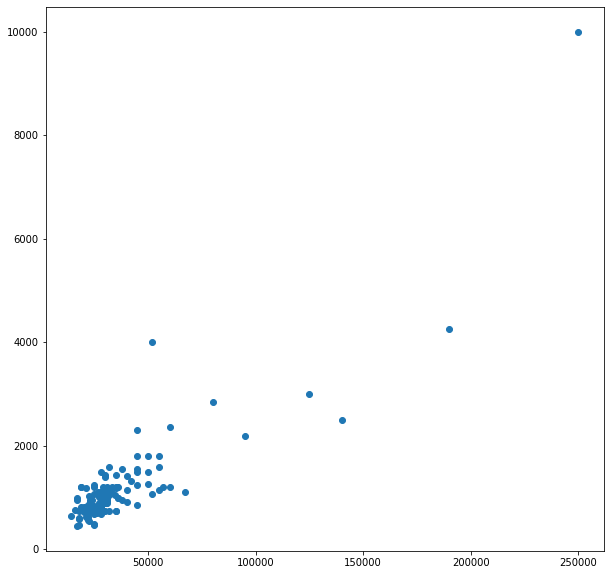

In [124]:
plt.figure(figsize=(10,10))
plt.scatter(data['rent'],data['area'])
plt.show()

In [18]:
df.to_csv("proprties_1Apr.csv")